# Monte-Carlo Simulation

## Aufgabenstellung

Wir betrachten weiter den Federspeicher aus Assignment 1. Diesmal simulieren wir die Ergebnisse der Fertigung für $N=10.000$ Zylinder. In diesem Assignment kommt die Federrate dazu. Das Federpaket besteht aus 24 Einzelfedern, die ineinander gesteckt auf dem Umfang des Zylinder verteilt sind. Die Toleranzen der Federn sind recht groß. Die Federn sind nominal

- $c_1 = (100 \pm 20)\, \mathrm{N/mm}$ 
- $c_2 = (150 \pm 30)\, \mathrm{N/mm}$ 
- $c_3 = (200 \pm 40)\, \mathrm{N/mm}$ 

Die Gesamtfederrate ergibt sich als

$$
c = \sum_{i=1}^{3} \sum_{j=1}^{8} c_{i,j}
$$

Die geometrischen Eigenschaften entspricht dem ersten Assignment:

 - Deviation $d$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{1}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{2}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Dev. $l$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$

Mit diesen Abweichungen vom Mittelwert ergibt sich die Kraft des Federspeichers als

$$
F = 2 i c(1 + h_1 + h_2 + l + d)
$$

mit der Übersetzungsrate des Zylinders $i = 2.6$.

Fragestellungen:

1. Federpaket:
   - a. Wie verhält sich das Federpaket im nominalen Zustand? Simuliert dazu mindestens $N=10^4$ stochastisch unabhängige Einzelfedern und bestimmt die Federrate von aus diesen Federn zusammengesetzten Federpaketen.
   - b. Die Federn $c_3$ liegen innerhalb der Toleranzen mit $c_3 < 200 \, \mathrm{N/mm}$. Wie ändert sich die Federrate?
2. Federspeicherzylinder: Welche Verteilungen ergeben sich für die Federspeicherzylinder mit Federpakete nach a. bzw. b.? Wie entwickelt sich der Anteil der konformen Einheiten ($F_{min} = 18 \,\mathrm{kN}$)?

Beantwortet die Fragestellungen in einem technischen Bericht mit Einleitung, Analyse und Beantwortung der Fragen.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Anzahl Federn
N = int(1e6)

In [3]:
#fixierter random Generator für reproduzierbare Zufallszahlen
rng = np.random.default_rng(42)
#Größe der Arrays - Nx8 
S = (N,8)

## Aufgabe 1.a

In [4]:
#Toleranzbänder der Federn
c1 = rng.uniform(low =80, high = 120, size = S)
c2 = rng.uniform(low =120, high = 180, size = S)
c3 = rng.uniform(low =160, high = 240, size = S)

In [5]:
#Gesamt Federsteifigkeit der Federpakete
c = np.sum (c1, axis = 1)+np.sum (c2, axis = 1)+np.sum (c3, axis = 1)

Text(0.5, 0, '$c$/(kN/m)')

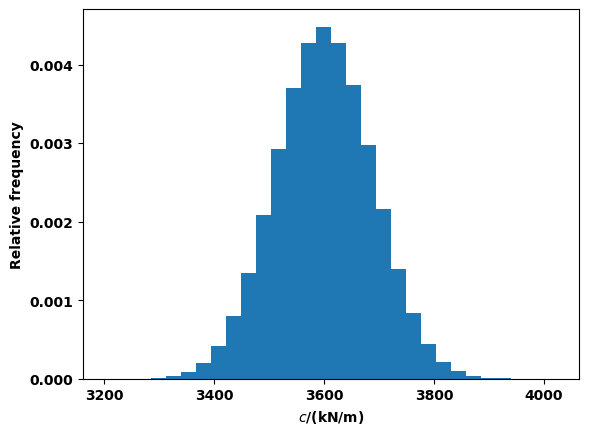

In [6]:
nbins = 30
plt.hist(c, density = True, bins = nbins)
plt.ylabel('Relative frequency')
plt.xlabel('$c$/(kN/m)')

In [7]:
print('Mean value:          ' + str(np.round(np.mean(c))))
print('Standard dev.:       ' + str(np.round(np.std(c))))
print('99% of realisations: ' + str(np.round(np.mean(c)-3*np.std(c))) + '...' + str(np.round(np.mean(c)+3*np.std(c)))) 

Mean value:          3600.0
Standard dev.:       88.0
99% of realisations: 3336.0...3864.0


## Aufgabe 1.b

In [8]:
#neue Toleranzbänder der Federn - c3 geändert
#Variable von c auf f geändert
f1 = rng.uniform(low =80, high = 120, size = S)
f2 = rng.uniform(low =120, high = 180, size = S)
f3 = rng.uniform(low =160, high = 200, size = S)

In [9]:
#Gesamt Federsteifigkeit der Federpakete
f = np.sum (f1, axis = 1)+np.sum (f2, axis = 1)+np.sum (f3, axis = 1)

Text(0.5, 0, '$f$/(kN/m)')

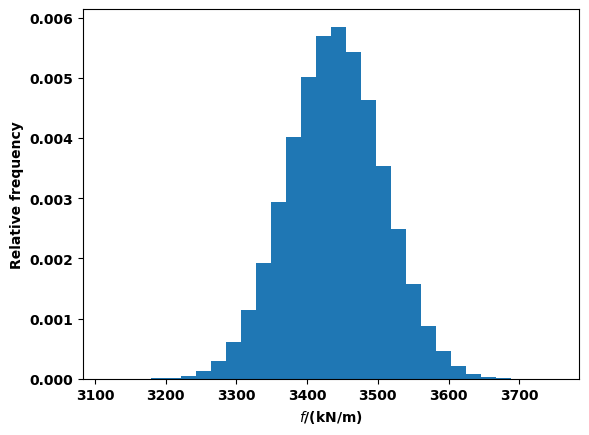

In [10]:
nbins = 30
plt.hist(f, density = True, bins = nbins)
plt.ylabel('Relative frequency')
plt.xlabel('$f$/(kN/m)')

In [12]:
print('Mean value:          ' + str(np.round(np.mean(f))))
print('Standard dev.:       ' + str(np.round(np.std(f))))
print('99% of realisations: ' + str(np.round(np.mean(f)-3*np.std(f))) + '...' + str(np.round(np.mean(f)+3*np.std(f)))) 

Mean value:          3440.0
Standard dev.:       67.0
99% of realisations: 3238.0...3642.0


In [18]:
d = np.round(np.mean(c)) - np.round(np.mean(f))
print('Die durchschnittliche Federsteifigkeit sinkt um ' + str(d) + ' kN/m.')

Die durchschnittliche Federsteifigkeit sinkt um 160.0 kN/m.
